In [1]:
import pandas as pd
import numpy as np
#import sklearn

# Load the `diabetes` dataset from `sklearn.datasets`

In [2]:
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()
df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
df['target'] = diabetes_data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Linear Relationship Assumption

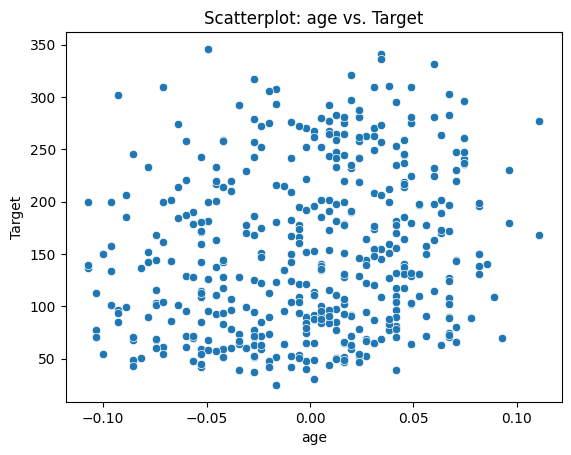

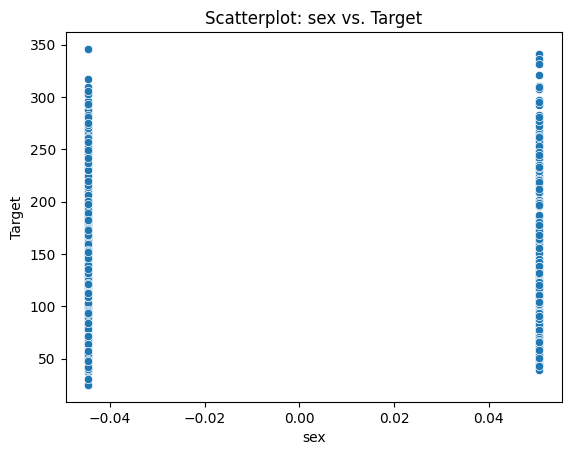

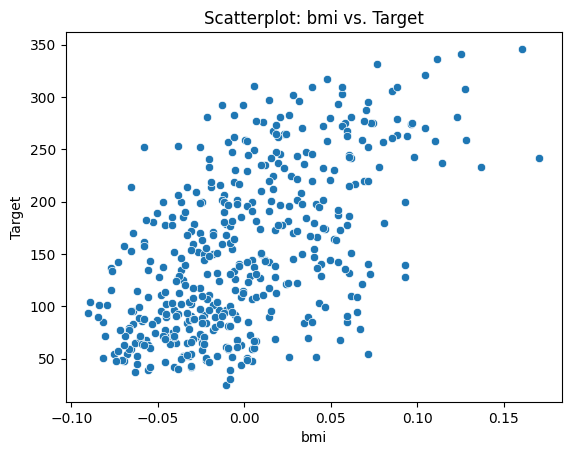

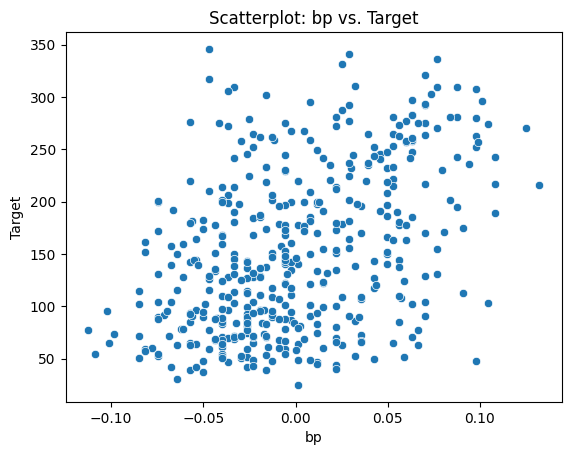

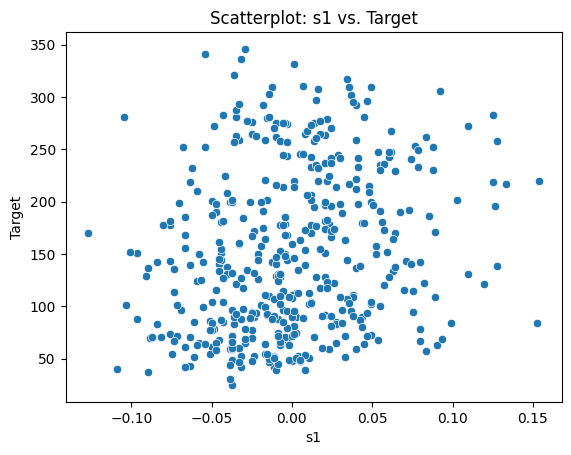

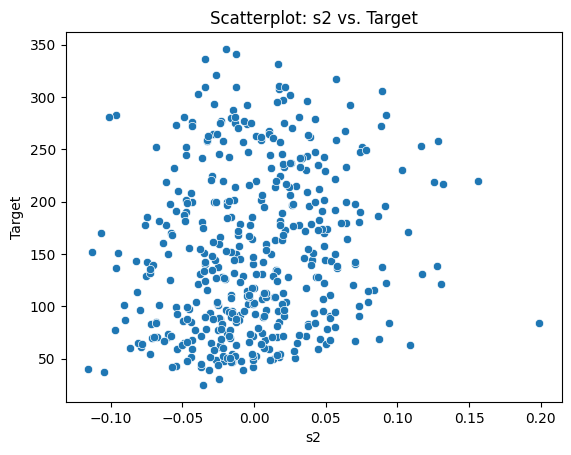

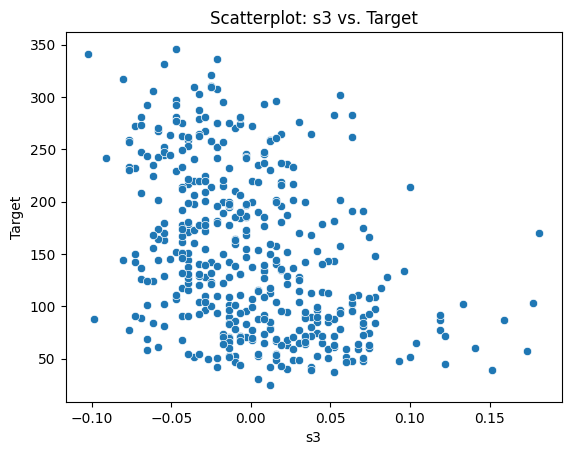

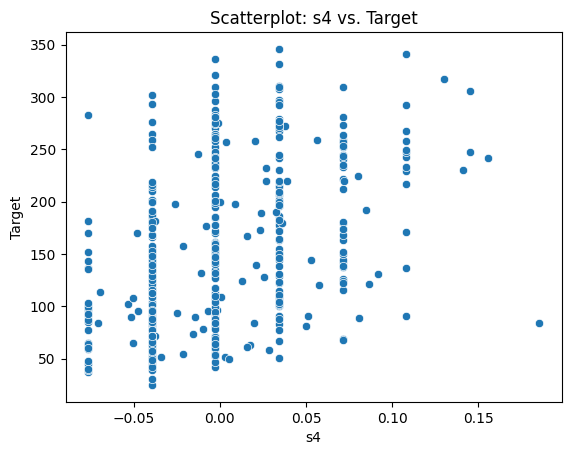

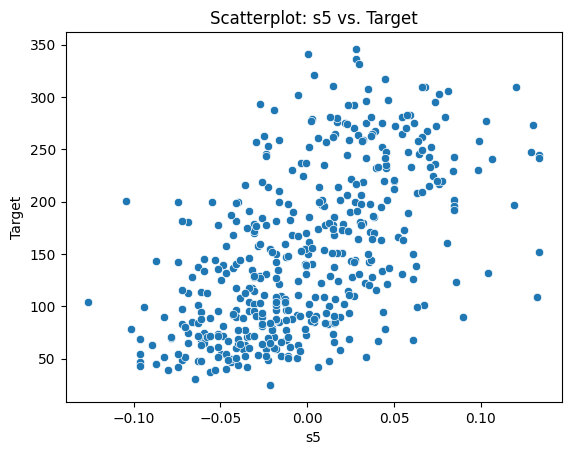

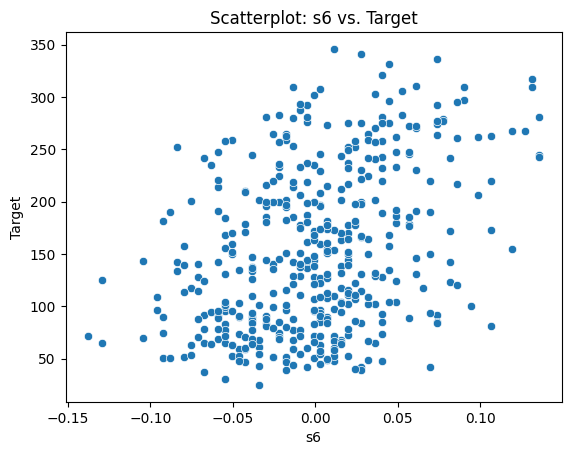

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate over each predictor
for column in df.columns[:-1]:
    # Create a scatterplot between each predictor and target
    plt.figure()
    sns.scatterplot(x=df[column], y=df['target'])
    plt.xlabel(column)
    plt.ylabel('Target')
    plt.title(f'Scatterplot: {column} vs. Target')

plt.show()

Some predictors in the dataset exhibit a linear relationship with the target variable, while others do not. When this happens, we have a few options:

1. Keep only the predictors with a linear relationship. By focusing on the predictors that demonstrate a clear linear relationship with the target, we can simplify the model and potentially improve its interpretability. However, this depends on the specific context of the analysis and we should consider factors such as domain knowledge and model interpretability when making this decision.

2. Transforming non-linear predictors using functions like logarithmic and square root might help capture non-linear relationships and help us satisfy the linearity assuption.

3. Creating new, domain-specific features by combining existing features can help us to better capture this linear relationsip between the predictors and response.





# Multi-collinearity Assumption

In [4]:
# create a correlation matrix for all the predictors

corr_matrix = df.iloc[:,:10].corr()
corr_matrix

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


Some predictors, such as `s3` and `s4` are strongly correlated with a correlation of -0.74. To satisfy the assumption for multi-collinearity, we might want to remove either of the predictors. We will need to have specific domain knowledge to decide which predictor to keep. Another way to mitigate the multi-collinearity problem is to combine or transform the 2 predictors into a single feature. Lastly, a regularization technique like Ridge or LASSO regression can shrink coefficient estimates and help simplify the model.



# Splitting data into train and test

In [11]:
from sklearn.model_selection import train_test_split

# We can also set a random_state (e.g. random_state=42) to ensure that the split will give the same
# train and test sets everytime.

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:10], df[["target"]], test_size=0.3)

In [12]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
71,-0.001882,-0.044642,0.033673,0.125158,0.024574,0.026243,-0.010266,-0.002592,0.026717,0.061054
171,-0.020045,-0.044642,-0.046085,-0.098627,-0.075870,-0.059873,-0.017629,-0.039493,-0.051404,-0.046641
190,0.009016,-0.044642,-0.012673,0.028758,-0.018080,-0.005072,-0.047082,0.034309,0.023371,-0.005220
79,-0.103593,-0.044642,-0.037463,-0.026328,0.002559,0.019980,0.011824,-0.002592,-0.068332,-0.025930
367,-0.009147,0.050680,0.170555,0.014987,0.030078,0.033759,-0.021311,0.034309,0.033654,0.032059
...,...,...,...,...,...,...,...,...,...,...
418,0.009016,-0.044642,-0.024529,-0.026328,0.098876,0.094196,0.070730,-0.002592,-0.021395,0.007207
168,0.001751,0.050680,0.059541,-0.002228,0.061725,0.063195,-0.058127,0.108111,0.068986,0.127328
381,-0.070900,0.050680,-0.089197,-0.074527,-0.042848,-0.025739,-0.032356,-0.002592,-0.012909,-0.054925
98,0.001751,0.050680,-0.005128,-0.012556,-0.015328,-0.013840,0.008142,-0.039493,-0.006081,-0.067351


# Fit a linear regression model and print the intercept and coefficients

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

coefficient = model.coef_[0]
intercept = model.intercept_

print("Intercept:", intercept)
print("Coefficient:", coefficient)

Intercept: [151.7752297]
Coefficient: [ -73.94242568 -230.89585587  431.74177953  325.39033926 -822.53153836
  561.18512539   43.10869925  125.7217128   766.63427728  116.57339768]


# Computing evaluation metrics

In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Obtain predictions from our model
y_pred = model.predict(X_test)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Compute R2
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

R-squared: 0.5366030437347099
Mean Squared Error (MSE): 2903.990341125475
Mean Absolute Error (MAE): 43.6979956681964


Our R-squared is not very high, suggesting that not a lot of the variation in the response is explained by the predictors.

We might want to look at other methods besides linear regression such as regression tree. Or, we can use Ridge/LASSO (or even PCA) to see if this will improve the performance of our model.

# Homoscedasticity Assumption

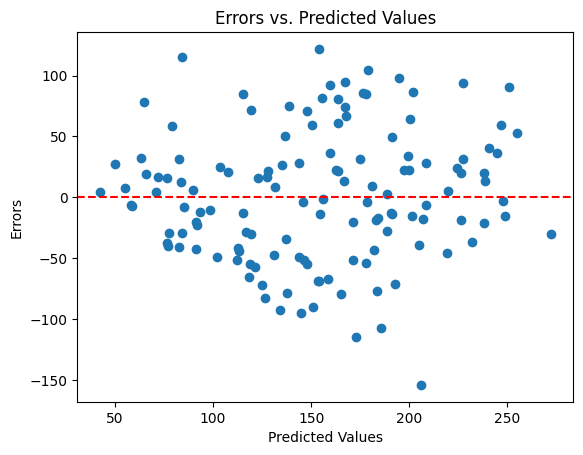

In [15]:
# Compute the errors (also known as the residuals)
errors = y_test - y_pred

# Check for homoscedasticity
plt.scatter(y_pred, errors)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')
plt.title('Errors vs. Predicted Values')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


When checking for the homoscedasticity assumption, we want to look for patterns in our residuals versus fitted plot. We can see a slight V-shaped pattern forming here, suggesting this assumption might be violated.

# Normally Distributed Errors Assumption

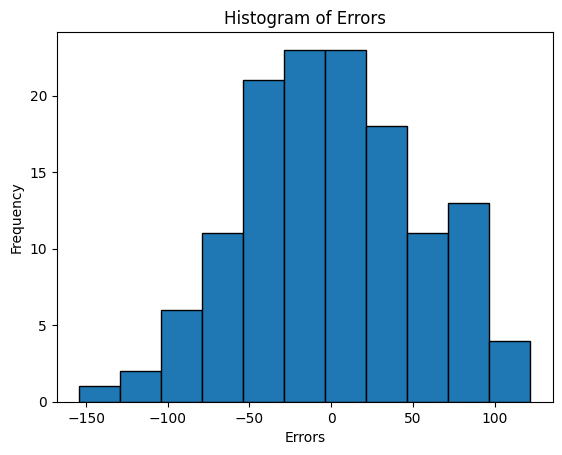

In [16]:
plt.hist(errors, bins='auto', edgecolor='black')  # 'auto' sets the number of bins automatically
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Histogram of Errors')
plt.show()

The distribution seems to follow a normal curve (a bell-shaped curve) with mean of 0. So, this assumption is satisfied.

Besides looking at the histogram of the errors, we can also look at the qqplot. If the observations seem to lie the line and do not deviate much, we can say that the distribution of the errors is normal.

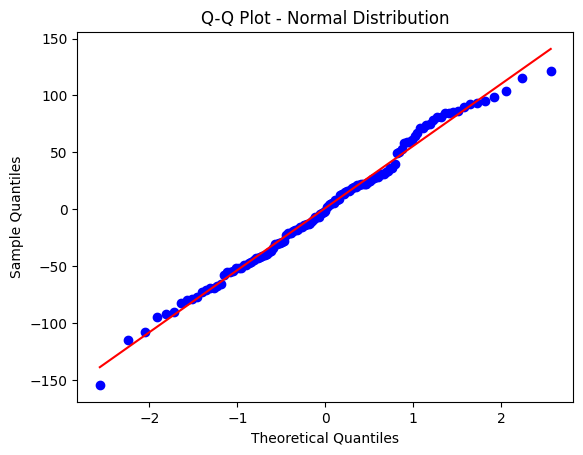

In [17]:
import scipy.stats as stats
import matplotlib.pyplot as plt

errors = np.ravel(errors)

# Generate the Q-Q plot
stats.probplot(errors, dist="norm", plot=plt)

plt.title("Q-Q Plot - Normal Distribution")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

plt.show()

# Connecting back to Multiple Linear Regression Part 1

In the previous article, we derived a closed form for the regression coefficients using the OLS technique. Let us also look at this and use linear algebra to compute the coefficients.

Note: as far as I know, `sklearn.linear_model.LinearRegression` also uses the OLS method

(https://www.projectpro.io/article/scikit-learn-linear-regression-example/539#:~:text=The%20LinearRegression%20method%20of%20sklearn,prediction%20of%20the%20LinearRegression%20model.)

In [18]:
# create a design matrix X with 1's as its first column (to account for the intercept term) and
# all the features as its subsequent columns
X_design = np.array(X_train)
ones_column = np.ones((X_train.shape[0], 1))
X_design = np.hstack((ones_column, X_design))

# Applying the closed-form solution derived previously to find the coefficients
np.dot(np.dot(np.linalg.inv(np.dot(X_design.T,X_design)),X_design.T),y_train)

array([[ 151.7752297 ],
       [ -73.94242568],
       [-230.89585587],
       [ 431.74177953],
       [ 325.39033926],
       [-822.53153836],
       [ 561.18512539],
       [  43.10869925],
       [ 125.7217128 ],
       [ 766.63427728],
       [ 116.57339768]])

In this case, b0 = 151.775, b1 = -73.942,... and so on. Since we have 9 predictors (age, sex, bmi,...), there will be b0 (intercept term), b1,..., b9. The array above gives us the (optimal) beta values that will minimize the loss function. We can use these values to get predictions.

For example, let's say person A has age = 0.0173, sex = 0.0143, bmi = 0.0185, bp = 0.0335, s1 = 0.0896, s2 = -0.0196, s3 = -0.0398, s4 = 0.0515, s5 = -0.0243, and s6 = 0.0524. We can use the beta values derived above to predict their disease progression one year after baseline, called y for short.

y = b0 + (b1) * (age) + (b2) * (sex) + ... + (b9) * (s5)

y = 151.775 + (-73.942) * (0.0173) + (-230.896) * (0.0143) + ... + (766.634) * (-0.0243) + (116.573) * (0.0524)
